# WeatherPy
----

### Analysis
* Northern vs. Southern Hemispheres: One might expect temperatures to decline predictably with distance from the equator, however it seems that the northern hemisphere has more extremes, at least at this time of year.  The first graph, which is based on maximum temperatures, indicates that the northern half of the planet gets colder quicker. It also seems that a greater number of cities are in humid, windy and cloudy conditions than the southern hemisphere. This could be because of earth's tilt, however more analysis is needed to be sure.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import config

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

In [3]:
cities_df = pd.DataFrame(cities)

cities_df.head()

,0
0,atuona
1,katangli
2,albany
3,barbar
4,nizhneyansk


In [4]:
cities_df.columns = ["City"]
cities_df.head()

,City
0,atuona
1,katangli
2,albany
3,barbar
4,nizhneyansk


In [5]:
#empty columns for dataframe
cities_df["Country"] = ""
cities_df["City ID"] = ""
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""

In [6]:
cities_df.head()

,City,Country,City ID,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,atuona,,,,,,,,
1,katangli,,,,,,,,
2,albany,,,,,,,,
3,barbar,,,,,,,,
4,nizhneyansk,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed '(with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = config.weather_api


# Build partial query URL
#{url}appid={api_key}&units={units}&q=
query_url = f"{url}&units={units}&APPID={api_key}&q="
query_url



'http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q='

In [8]:
#api call from open weather
print(f"Beginning Data Retrieval")
print(f"-------------------------------")



record = 1

for index, row in cities_df.iterrows():
    print(row['City'])
    try:


        cities_url = query_url + row["City"]
        cities_response = requests.get(cities_url).json()



        #city.append(response["name"])
        row["Country"] = cities_response["sys"]["country"]
        row["City ID"] = cities_response["sys"]["id"]
        row["Latitude"] = cities_response["coord"]["lat"]
        row["Longitude"] = cities_response["coord"]["lon"]
        row['Temperature (F)'] = cities_response["main"]["temp_max"]
        row['Humidity (%)'] = cities_response["main"]["humidity"]
        row['Cloudiness (%)'] = cities_response["clouds"]["all"]
        row['Wind Speed (mph)'] = cities_response["wind"]["speed"]




        record += 1 



        #print(city+"&id="+str(cities_url))
        print(cities_url)


    except:
        print(f"Data is missing, skipping")
        continue
            

Beginning Data Retrieval
-------------------------------
atuona
Data is missing, skipping
katangli
Data is missing, skipping
albany
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=albany
barbar
Data is missing, skipping
nizhneyansk
Data is missing, skipping
loviisa
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=loviisa
pyapon
Data is missing, skipping
rikitea
Data is missing, skipping
mandalgovi
Data is missing, skipping
aklavik
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=aklavik
butaritari
Data is missing, skipping
tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=tuktoyaktuk
hermanus
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=hermanus
mataura
http://api.openweathermap.org/data/2.5/weather?

http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=maldonado
port elizabeth
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=port elizabeth
meadow lake
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=meadow lake
mar del plata
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=mar del plata
okhotsk
Data is missing, skipping
manado
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=manado
aykhal
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=aykhal
sentyabrskiy
Data is missing, skipping
erfurt
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=erfurt
whitianga
http://api.openweathermap.org/data/2.5/weather?&units=i

Data is missing, skipping
alyangula
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=alyangula
attawapiskat
Data is missing, skipping
ambanja
Data is missing, skipping
nautla
Data is missing, skipping
grand gaube
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=grand gaube
dunedin
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=dunedin
domat
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=domat
puerto ayora
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=puerto ayora
high level
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=high level
cape town
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=cape town


Data is missing, skipping
sibu
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=sibu
vikulovo
Data is missing, skipping
saint-gaudens
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=saint-gaudens
gamba
Data is missing, skipping
gamboula
Data is missing, skipping
sioux lookout
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=sioux lookout
kieta
Data is missing, skipping
kemptville
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=kemptville
kashi
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=kashi
saint-joseph
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=saint-joseph
sorvag
Data is missing, skipping
avera
http://api.openweathermap.org/data/2.5/weather?&uni

http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=rovaniemi
san luis de planes
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=san luis de planes
nuuk
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=nuuk
kalianget
Data is missing, skipping
poronaysk
Data is missing, skipping
palmital
Data is missing, skipping
dikson
Data is missing, skipping
kiama
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=kiama
blagoyevo
Data is missing, skipping
hailar
Data is missing, skipping
port moresby
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=port moresby
xining
Data is missing, skipping
tigil
Data is missing, skipping
myski
Data is missing, skipping
douentza
Data is missing, skipping
lhokseumawe
Data is missing, skipping
le po

Data is missing, skipping
ghanzi
Data is missing, skipping
bundaberg
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=bundaberg
galiakot
Data is missing, skipping
kigoma
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=kigoma
sabang
Data is missing, skipping
provideniya
Data is missing, skipping
caninde
Data is missing, skipping
kegayli
Data is missing, skipping
wewak
Data is missing, skipping
mandiana
Data is missing, skipping
hvolsvollur
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=hvolsvollur
changqing
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=changqing
sambava
Data is missing, skipping
embu
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=embu
kruisfontein
Data is missing, skipping
norden
http://api.o

Data is missing, skipping


In [9]:
# Remove empty cells. 
#convert string to np.nan
cities_df["Temperature (F)"].replace('', np.nan, inplace=True)
cities_df["City ID"].replace('', np.nan, inplace=True)
cities_df["Latitude"].replace('', np.nan, inplace=True)
cities_df["Longitude"].replace('', np.nan, inplace=True)
cities_df["Humidity (%)"].replace('', np.nan, inplace=True)
cities_df["Cloudiness (%)"].replace('', np.nan, inplace=True)
cities_df["Wind Speed (mph)"].replace('', np.nan, inplace=True)
cities_df.head(10)

,City,Country,City ID,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,atuona,PF,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,katangli,RU,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,albany,US,19530.0,42.60,-73.97,81.0,39.0,62.0,10.74
3,barbar,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nizhneyansk,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,loviisa,FI,2004269.0,60.46,26.23,72.0,60.0,0.0,1.01
6,pyapon,MM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,rikitea,PF,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,mandalgovi,MN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,aklavik,CA,821.0,68.22,-135.01,51.8,57.0,90.0,9.17


### Save to CSV

In [10]:
clean_data_df = cities_df.dropna(how = 'any')

clean_data_df.head(10)

,City,Country,City ID,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
2,albany,US,19530.0,42.60,-73.97,81.00,39.0,62.0,10.74
5,loviisa,FI,2004269.0,60.46,26.23,72.00,60.0,0.0,1.01
9,aklavik,CA,821.0,68.22,-135.01,51.80,57.0,90.0,9.17
11,tuktoyaktuk,CA,942.0,69.45,-133.04,37.40,93.0,90.0,9.17
12,hermanus,ZA,2003650.0,-34.42,19.23,54.00,81.0,6.0,7.00
13,mataura,NZ,2008959.0,-46.19,168.86,39.00,83.0,79.0,3.00
14,new norfolk,AU,2031307.0,-42.78,147.06,39.99,84.0,56.0,3.04
16,champerico,GT,7068.0,14.30,-91.92,89.60,59.0,40.0,6.93
22,yulara,AU,9487.0,-25.24,130.99,42.80,60.0,0.0,5.82
26,tautira,PF,7318.0,-17.73,-149.15,78.80,69.0,20.0,11.41


In [11]:
#Save dataframe to csv
clean_data_df.to_csv('cities_edited.csv', index=None)
# Display data frame head 
clean_data_df.head()

,City,Country,City ID,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
2,albany,US,19530.0,42.60,-73.97,81.0,39.0,62.0,10.74
5,loviisa,FI,2004269.0,60.46,26.23,72.0,60.0,0.0,1.01
9,aklavik,CA,821.0,68.22,-135.01,51.8,57.0,90.0,9.17
11,tuktoyaktuk,CA,942.0,69.45,-133.04,37.4,93.0,90.0,9.17
12,hermanus,ZA,2003650.0,-34.42,19.23,54.0,81.0,6.0,7.00


In [12]:
df=pd.read_csv('cities_edited.csv', index_col=None)

In [13]:
df.head()

,City,Country,City ID,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,albany,US,19530.0,42.60,-73.97,81.0,39.0,62.0,10.74
1,loviisa,FI,2004269.0,60.46,26.23,72.0,60.0,0.0,1.01
2,aklavik,CA,821.0,68.22,-135.01,51.8,57.0,90.0,9.17
3,tuktoyaktuk,CA,942.0,69.45,-133.04,37.4,93.0,90.0,9.17
4,hermanus,ZA,2003650.0,-34.42,19.23,54.0,81.0,6.0,7.00


### Plotting the Data & Saving Images


#### Latitude vs. Temperature Plot

In [14]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 8]

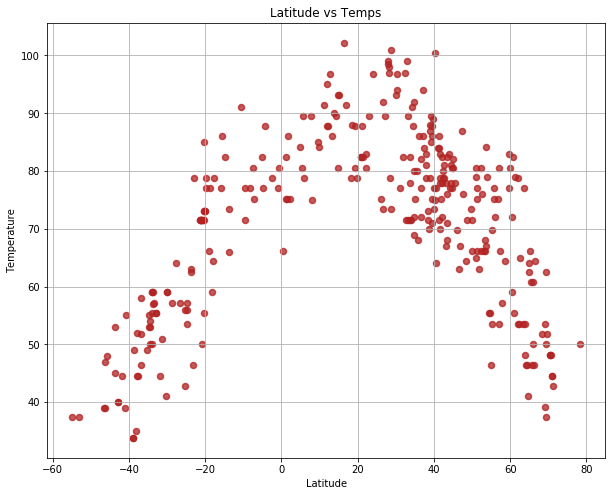

In [15]:
x=df["Latitude"]
y=df["Temperature (F)"]
plt.scatter(x, y, alpha = 0.75, linewidth = 1.5, color='firebrick',)

#Add title, x axis label and y axis label.
plt.title("Latitude vs Temps")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.savefig('images/temperature.png')
#Show plot.
plt.show()

#### Latitude vs. Humidity Plot

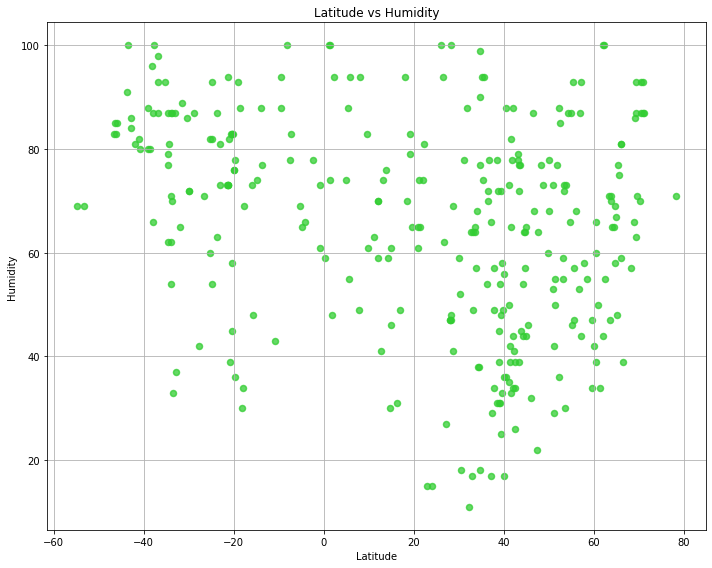

In [16]:
plt.scatter(df["Latitude"], df["Humidity (%)"], color = "limegreen", alpha = 0.75, linewidth = 1.5)

#Add title, x axis label and y axis label.
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.tight_layout()
#save fig
plt.savefig("images/humidity.png")
#Show plot.
plt.show()

#### Latitude vs. Cloudiness Plot

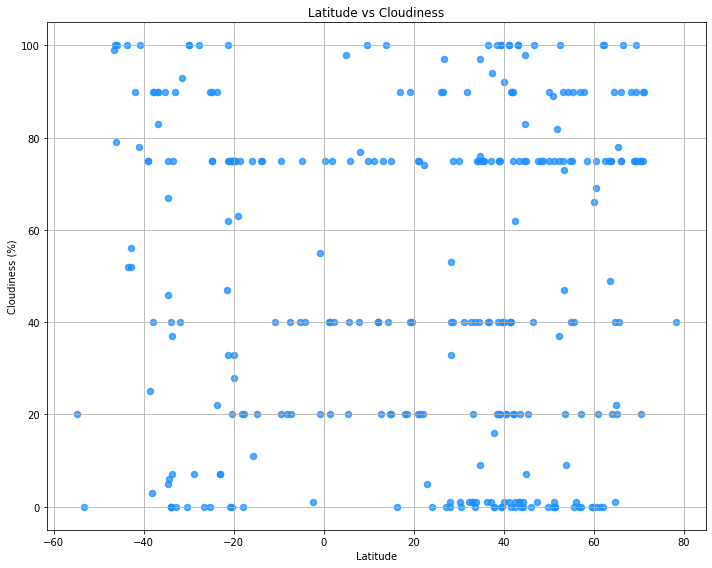

In [17]:
plt.scatter(df["Latitude"], df["Cloudiness (%)"], color = "dodgerblue", alpha = 0.75, linewidth = 1.5)

#Add title, x axis label and y axis label.
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.tight_layout()
#save plot
plt.savefig("images/cloudiness.png")
#Show plot.
plt.show()

#### Latitude vs. Wind Speed Plot

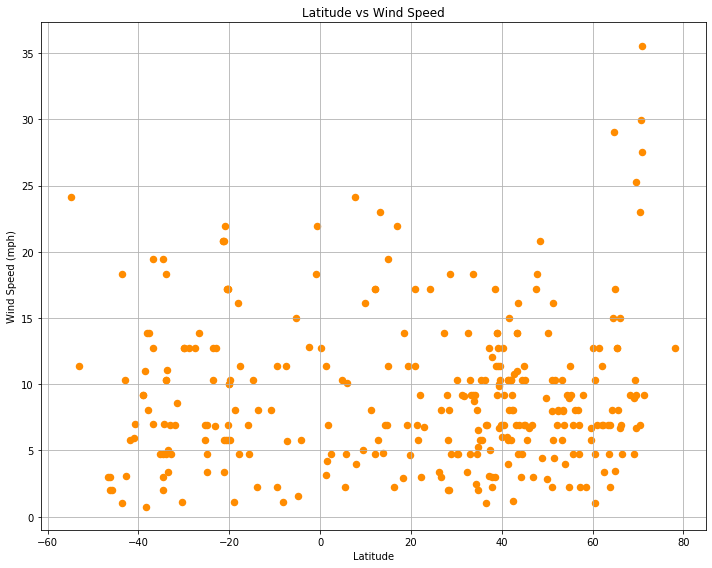

In [18]:
plt.scatter(df["Latitude"], df['Wind Speed (mph)'], color = "darkorange", alpha = 1, linewidth = 1.5)

#Add title, x axis label and y axis label.
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.tight_layout()
#save plot
plt.savefig("images/windspeed")
#Show plot.
plt.show()

In [19]:
from scipy.stats import linregress

In [20]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig("images/lin_reg" + title)
    
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames
n_h_df = df.loc[(df['Latitude'] >= 0)]
s_h_df = df.loc[(df['Latitude'] < 0)]

## Linear Regression

##### Low r values suggest that there is not much going on here in terms of correlation.

#### Maximum Temps vs Lat

The r-squared is: 0.4830728340457877


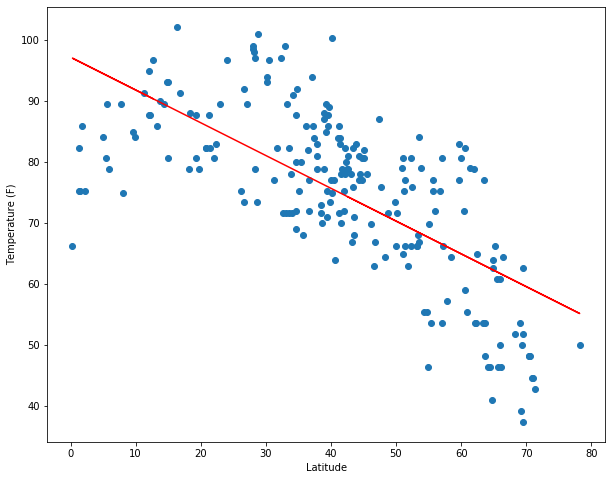

In [22]:
#max temp northern hemisphere
x_values = n_h_df["Latitude"]
y_values = n_h_df["Temperature (F)"]


plot_linear_regression(x_values, y_values, 'Temperature (F)',(6,30))


The r-squared is: 0.046616942709262275


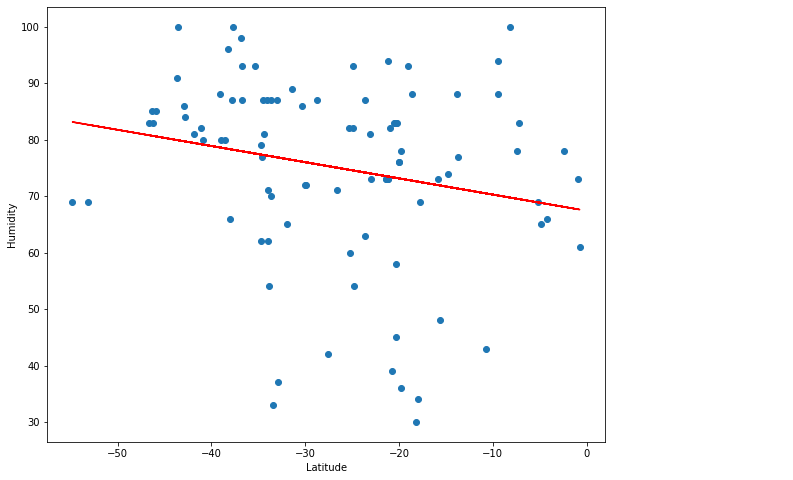

In [23]:
#max temp southern
x_values = s_h_df["Latitude"]
y_values = s_h_df["Humidity (%)"]
plot_linear_regression(x_values, y_values, 'Humidity',(6,30))

#### Humidity vs Lat


The r-squared is: 0.0007302355454503907


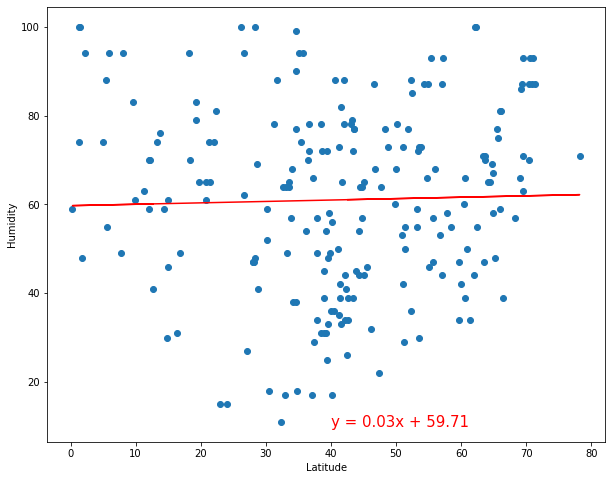

In [24]:
# Northern Hemisphere
x_values = n_h_df["Latitude"]
y_values = n_h_df["Humidity (%)"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-squared is: 0.046616942709262275


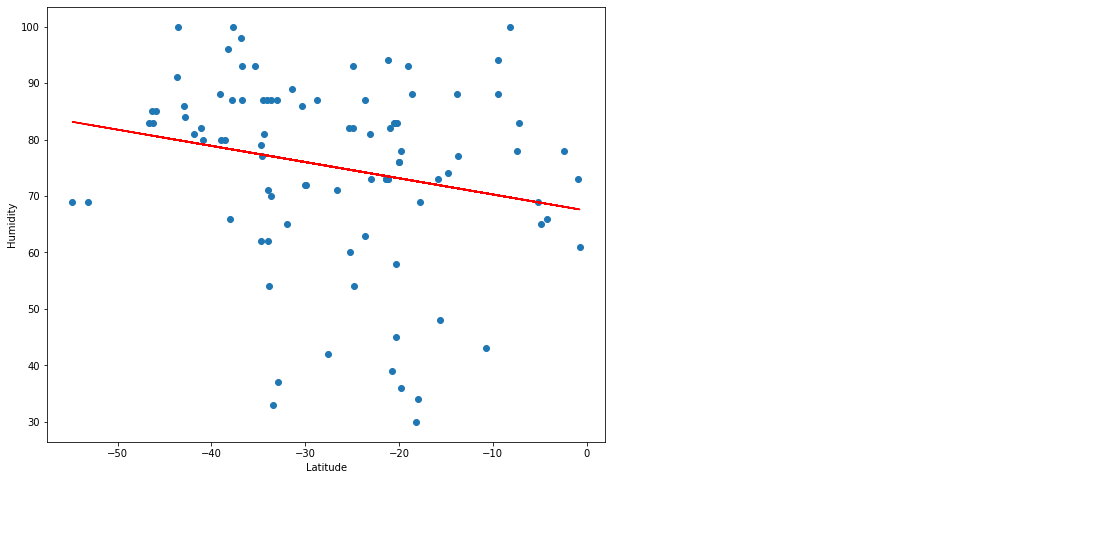

In [25]:
# Southern Hemisphere
x_values = s_h_df["Latitude"]
y_values = s_h_df["Humidity (%)"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

#### Wind vs Latitude

The r-squared is: 0.009911287929051932


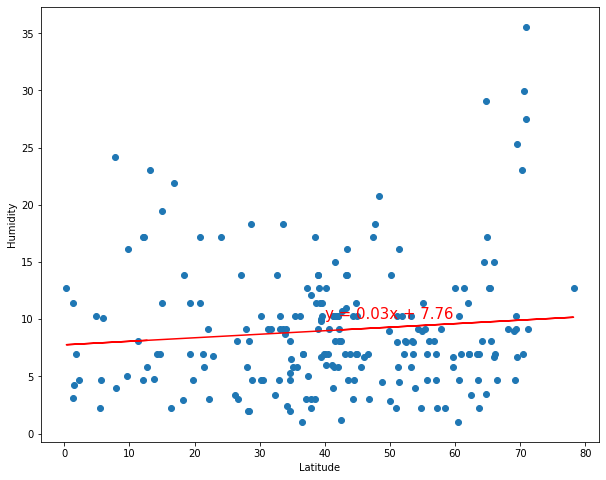

In [26]:
x_values = n_h_df["Latitude"]
y_values = n_h_df["Wind Speed (mph)"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-squared is: 0.010675947613233792


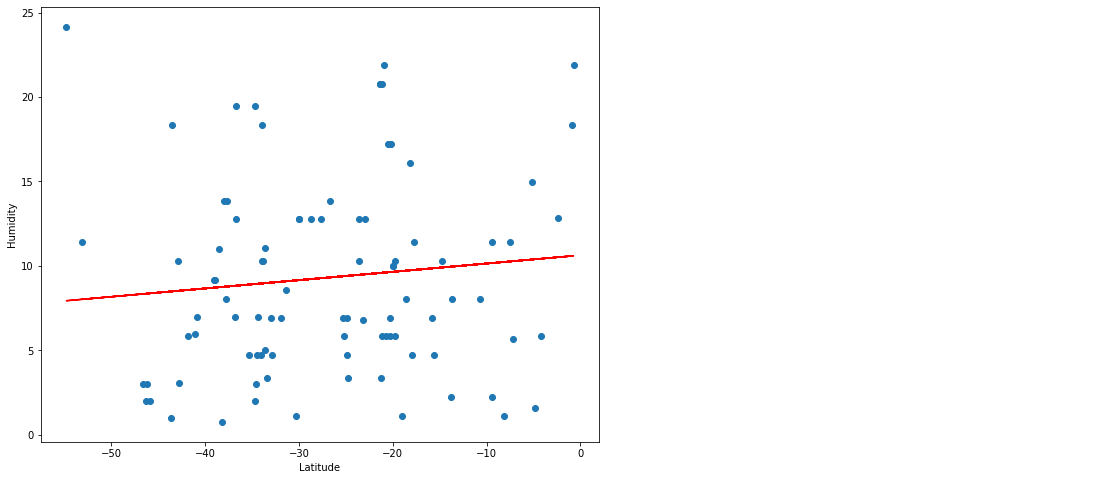

In [27]:
x_values = s_h_df["Latitude"]
y_values = s_h_df["Wind Speed (mph)"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

## Humidity GMap

In [28]:
import requests
import gmaps
import os
from config import goog_key

In [29]:
# Configure gmaps
gmaps.configure(api_key=goog_key)

In [30]:
# Heatmap of humidity
locations = df[["Latitude", "Longitude"]]
humidity = df["Humidity (%)"]
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=200, point_radius=3)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))